In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

2025-09-02 17:04:50.035037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756821890.054646 1137089 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756821890.059714 1137089 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756821890.080301 1137089 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756821890.080317 1137089 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756821890.080318 1137089 computation_placer.cc:177] computation placer alr

### Load XP coefficients

One row per sample sds, first column is GaiaDR3 name of source.

In [2]:
coeffs = pd.read_csv("data/coeffs_20061_L2-norm.csv")

# Columns in coeffs table that are not GaiaEDR3
xp_columns = coeffs.columns[coeffs.columns != "GaiaDR3"]

coeffs

,GaiaDR3,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,1306361548360576,0.802174,-0.438985,0.142336,-0.072555,0.034179,0.038145,-0.006003,0.009760,-0.059432,...,-5.692183e-07,-0.001073,0.000135,-0.000053,-0.000236,0.000061,0.000185,0.000165,-0.000026,0.000015
1,1792620565667968,0.799447,-0.447756,0.144183,-0.075735,0.035157,0.034266,0.000626,0.009668,-0.049066,...,3.872657e-04,-0.000244,-0.000614,-0.000013,-0.000117,0.000098,0.000188,-0.000206,0.000249,0.000004
2,6052403489630720,0.798218,-0.454831,0.147778,-0.076139,0.038208,0.037110,-0.001446,0.011269,-0.053055,...,-8.157036e-05,0.000076,0.000032,-0.000043,0.000010,-0.000005,0.000078,0.000051,-0.000003,-0.000006
3,6353119919810816,0.808731,-0.399915,0.111917,-0.056288,0.025472,0.020939,0.005724,-0.002347,-0.031065,...,4.021425e-04,0.000079,-0.000456,0.000572,0.000364,0.000180,-0.000272,0.000044,0.000172,-0.000048
4,10844075163628928,0.808262,-0.355471,0.090168,-0.042227,0.023493,0.021350,0.002948,0.003520,-0.022780,...,-5.574701e-04,-0.000250,0.000301,-0.000507,-0.000030,-0.000339,-0.000108,-0.000093,0.000037,-0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,6916087950150111232,0.809509,-0.396746,0.106315,-0.049642,0.020378,0.008975,0.007587,0.000231,-0.002281,...,-2.103597e-04,0.000034,0.000359,0.000149,0.000114,0.000094,0.000278,0.000006,0.000174,-0.000030
20057,6916186184642798848,0.799172,-0.450158,0.146705,-0.076971,0.036389,0.032352,-0.000217,0.009924,-0.046470,...,8.230682e-04,-0.000727,-0.000554,0.000248,-0.000483,0.000210,-0.000206,0.000062,-0.000148,0.000073
20058,6916517859197240320,0.801902,-0.443803,0.139229,-0.071418,0.033194,0.025920,0.001366,0.005806,-0.043695,...,7.816076e-05,0.000050,-0.000036,-0.000005,0.000164,-0.000102,0.000162,0.000022,-0.000050,0.000067
20059,6916925361398340096,0.799317,-0.441103,0.142491,-0.073758,0.036945,0.034145,-0.000886,0.008974,-0.047192,...,1.444348e-04,-0.000408,-0.000242,-0.000035,0.000004,-0.000022,-0.000207,0.000111,0.000003,-0.000020


### Make similarity map of XP coefficients with UMAP

/home/markus/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0.001, n_jobs=1, n_neighbors=10, random_state=69, verbose=1)
Tue Sep  2 17:04:56 2025 Construct fuzzy simplicial set
Tue Sep  2 17:04:56 2025 Finding Nearest Neighbors
Tue Sep  2 17:04:56 2025 Building RP forest with 12 trees
Tue Sep  2 17:04:59 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Tue Sep  2 17:05:05 2025 Finished Nearest Neighbor Search
Tue Sep  2 17:05:06 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Sep  2 17:05:15 2025 Finished embedding


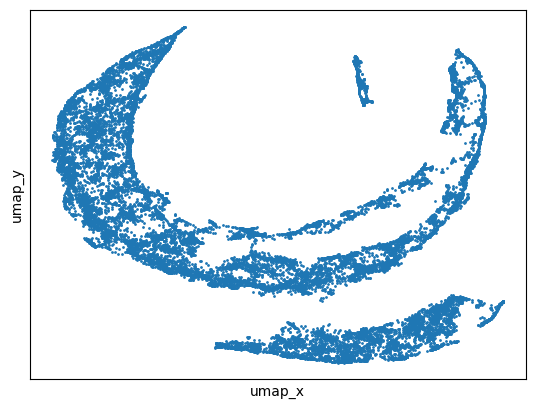

In [3]:
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.001, metric="euclidean",
                       verbose=1, random_state=69)

umap_embedding = umap_model.fit_transform(coeffs[xp_columns])

coeffs["umap_x"] = -umap_embedding[:, 0]
coeffs["umap_y"] = -umap_embedding[:, 1]

plt.scatter(coeffs["umap_x"], coeffs["umap_y"], s=1)
plt.xlabel("umap_x")
plt.ylabel("umap_y")
plt.xticks([])
plt.yticks([])
plt.show()

#### Save similarity map x and y to file

In [5]:
filepath = "data/similarity_map_xy.csv"
coeffs[["GaiaDR3", "umap_x", "umap_y"]].to_csv(path_or_buf=filepath, index=False)

print(f"Similarity map coordiantes saved to {filepath}")

Similarity map coordiantes saved to data/similarity_map_xy.csv
